In [1]:
import pandas as pd
import sklearn
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import numpy as np
import seaborn as sb
import statsmodels.api as sm

In [2]:
# Loading data
data = pd.read_excel('ЛР1 ПАД.xlsx')
X = data.drop(data.columns[[0, 1]], axis=1)
# matrix X with a free member
X.insert(0, 'x0', 1)
Y = data['Y']

### 1. Нормирование исходных данных

In [3]:
# l2 data normalization
X_preprocessed = pd.DataFrame(preprocessing.normalize(X, norm='l2'))
X_preprocessed

,0,1,2,3,4,5,6,7,8,9
0,0.000475,0.004368,0.007549,0.003703,0.002516,0.007929,0.080235,0.070265,0.010777,0.994158
1,0.000562,0.004268,0.009210,0.003763,0.002640,0.008705,0.080872,0.084242,0.015669,0.992934
2,0.000502,0.003665,0.009188,0.003163,0.002460,0.009841,0.069286,0.066776,0.016920,0.995110
3,0.000609,0.004815,0.009996,0.004145,0.003047,0.010727,0.120071,0.094472,0.016213,0.987993
4,0.000606,0.004790,0.010307,0.003820,0.002668,0.012187,0.110347,0.096402,0.018492,0.988882
5,0.000831,0.006651,0.014051,0.006818,0.003825,0.012887,0.432342,0.163791,0.015880,0.886302
6,0.000831,0.005982,0.014622,0.006729,0.004320,0.013376,0.118802,0.137079,0.025920,0.982818
7,0.000749,0.006514,0.011980,0.005690,0.003294,0.014151,0.160226,0.120544,0.016996,0.979325
8,0.000670,0.005225,0.011991,0.004823,0.002880,0.010517,0.105841,0.109191,0.016345,0.988076
9,0.000477,0.003819,0.008069,0.003294,0.002244,0.008021,0.088324,0.069704,0.009453,0.993524


### 2. Расчет весов линейной регрессии по аналитической формуле

In [5]:
# Matrix X transposition
X_transposed = np.transpose(X_preprocessed)
# Covariance matrix
covariance_matr = np.matmul(X_transposed, X_preprocessed)
# Inverse covariance matrix
covariance_matr_inv = pd.DataFrame(np.linalg.inv(covariance_matr))
# Calculating the weight matrix
analytical_weights = np.matmul(np.matmul(covariance_matr_inv, X_transposed), Y)
analytical_weights = pd.DataFrame(analytical_weights)
analytical_weights

,0
0,35858.412737
1,-1467.902829
2,-1299.881086
3,3223.601143
4,-3069.089818
5,11.611436
6,9.179261
7,-40.525204
8,-104.892161
9,56.542348


### 3. Построение корреляционной матрицы. Расчет числа обусловленности

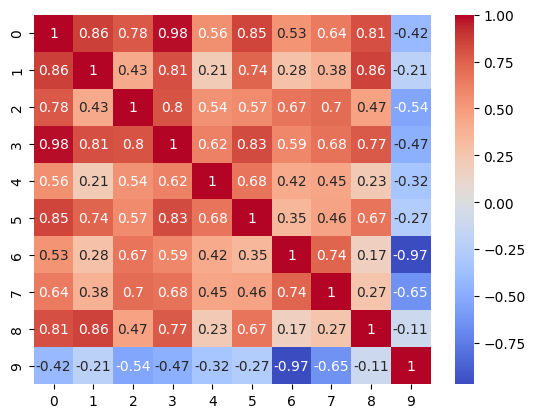

In [6]:
# Correlation matrix
df_plot = sb.heatmap(X_preprocessed.corr(), cmap="coolwarm", annot=True)

In [ ]:
# Condition number of a matrix with l2 normalization
np.linalg.cond(X)

Число обусловленности равно 48894, что говорит о сильной мультиколлинеарности

### 4. Анализ регрессионных остатков

In [ ]:
# Y predicted by the analytical method
Y_predicted = np.matmul(X_preprocessed, analytical_weights)
MSE = mean_squared_error(Y, Y_predicted)
RMSE = MSE ** 0.5
R2 = r2_score(Y, Y_predicted)

print(f'RMSE: {RMSE}')
print(f'Коэффициент детерминации: {R2}')

### 5. Определение весов линейной регрессии градиентным методом

In [ ]:
# Unit vector of weights for the first iteration
weights_i = [1] * len(X.columns)
# Number of rows
n = len(X)
convergence_step = 0.1
for i in range(1, 100):
    Y_predicted_i = np.matmul(X_preprocessed, weights_i)
    MSE = mean_squared_error(Y, Y_predicted_i)
    delta = Y - Y_predicted_i
    ds_dw = -2/n * (np.matmul(delta, X_preprocessed))
    weights_i = weights_i - convergence_step * ds_dw

Y_predicted_i = np.matmul(X_preprocessed, weights_i)
MSE = mean_squared_error(Y, Y_predicted_i)
RMSE = MSE ** 0.5
R2 = r2_score(Y, Y_predicted_i)

print(f'RMSE: {RMSE}')
print(f'Коэффициент детерминации: {R2}')

### 7. Fit-predict модели линейной регрессии c помощью библиотеки sklearn 

In [ ]:
# Creating a model using sklearn
lin_reg = LinearRegression().fit(X, Y)
# Y predicted by the sklearn
Y_predict_sklearn = lin_reg.predict(X)
MSE = mean_squared_error(Y, Y_predict_sklearn)
RMSE = MSE ** 0.5

print(MSE)
print(RMSE)
print(f'\nОценочные коэффициенты:')
pd.DataFrame(lin_reg.coef_)

### 8. «Эконометрический» результат обучения модели линейной регрессии с помощью библиотеки statmodels

In [ ]:
# Creating a model using statmodels
results = sm.OLS(Y, X).fit()
print(results.summary())